# Data Preprocessing

## Import the libraries

In [70]:
!pip install ibm-cos-sdk | grep -v 'already satisfied'
import ibm_boto3
from ibm_botocore.client import Config
import pandas as pd
import numpy as np
import io, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler

## Importing the dataset

In [71]:
# The code was removed by Watson Studio for sharing.

,date,price
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


## Handling missing data

In [72]:
df.isnull().any()

date     False
price     True
dtype: bool

In [73]:
df.dropna(axis=0,inplace=True)
df.isnull().any()

date     False
price    False
dtype: bool

In [74]:
df.shape

(8216, 2)

## Data visualization

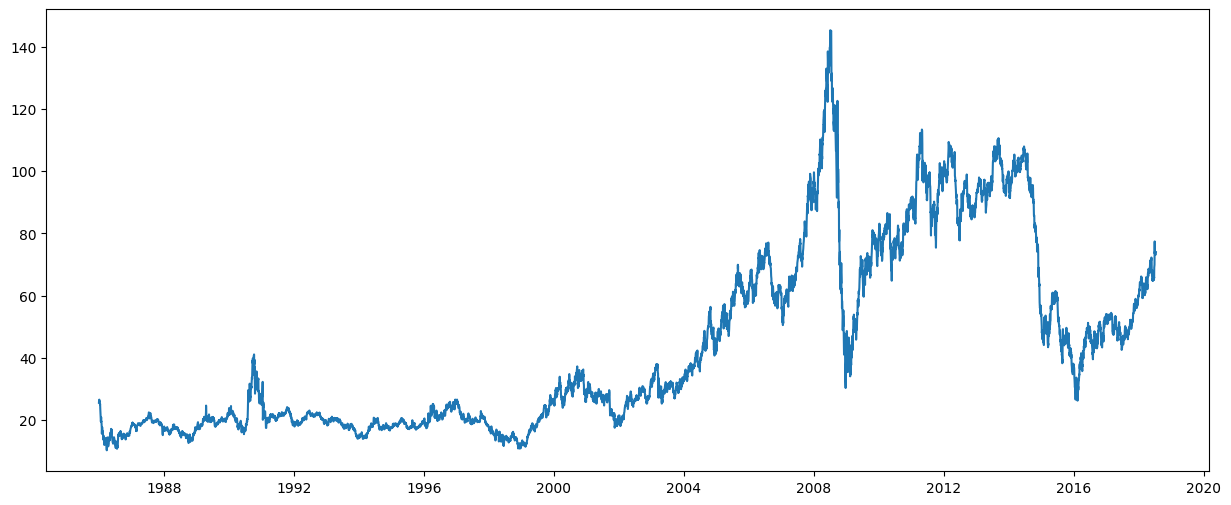

In [75]:
plot = plt.figure(figsize=(15, 6))
time = pd.to_datetime(df['date'])
price = list(df['price'])
data = pd.Series(price, time)
plt.plot(data)

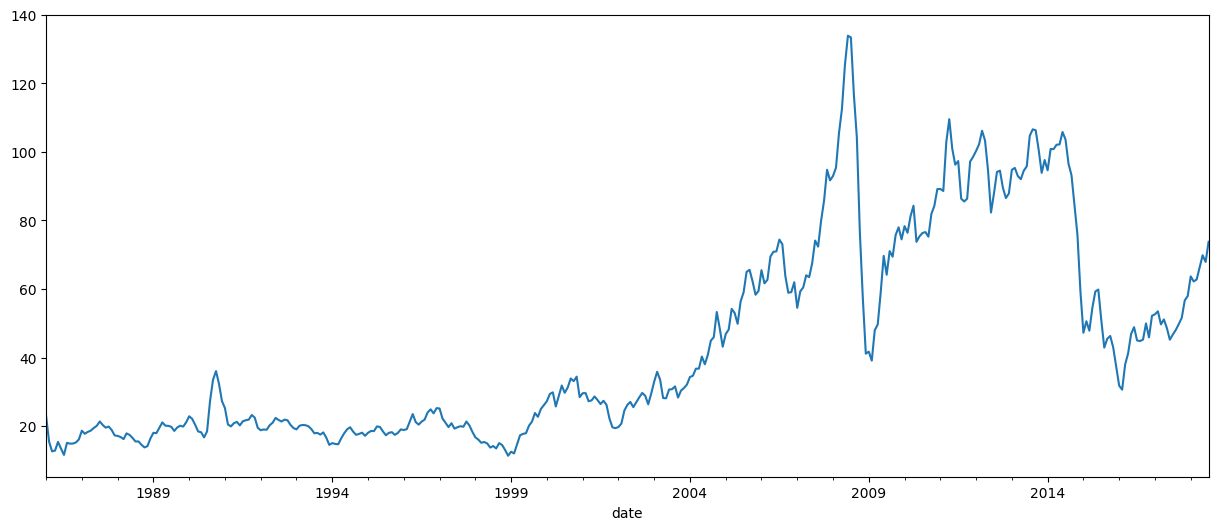

In [76]:
#Decompose the plot
df.set_index('date', inplace=True)
y = df['price'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

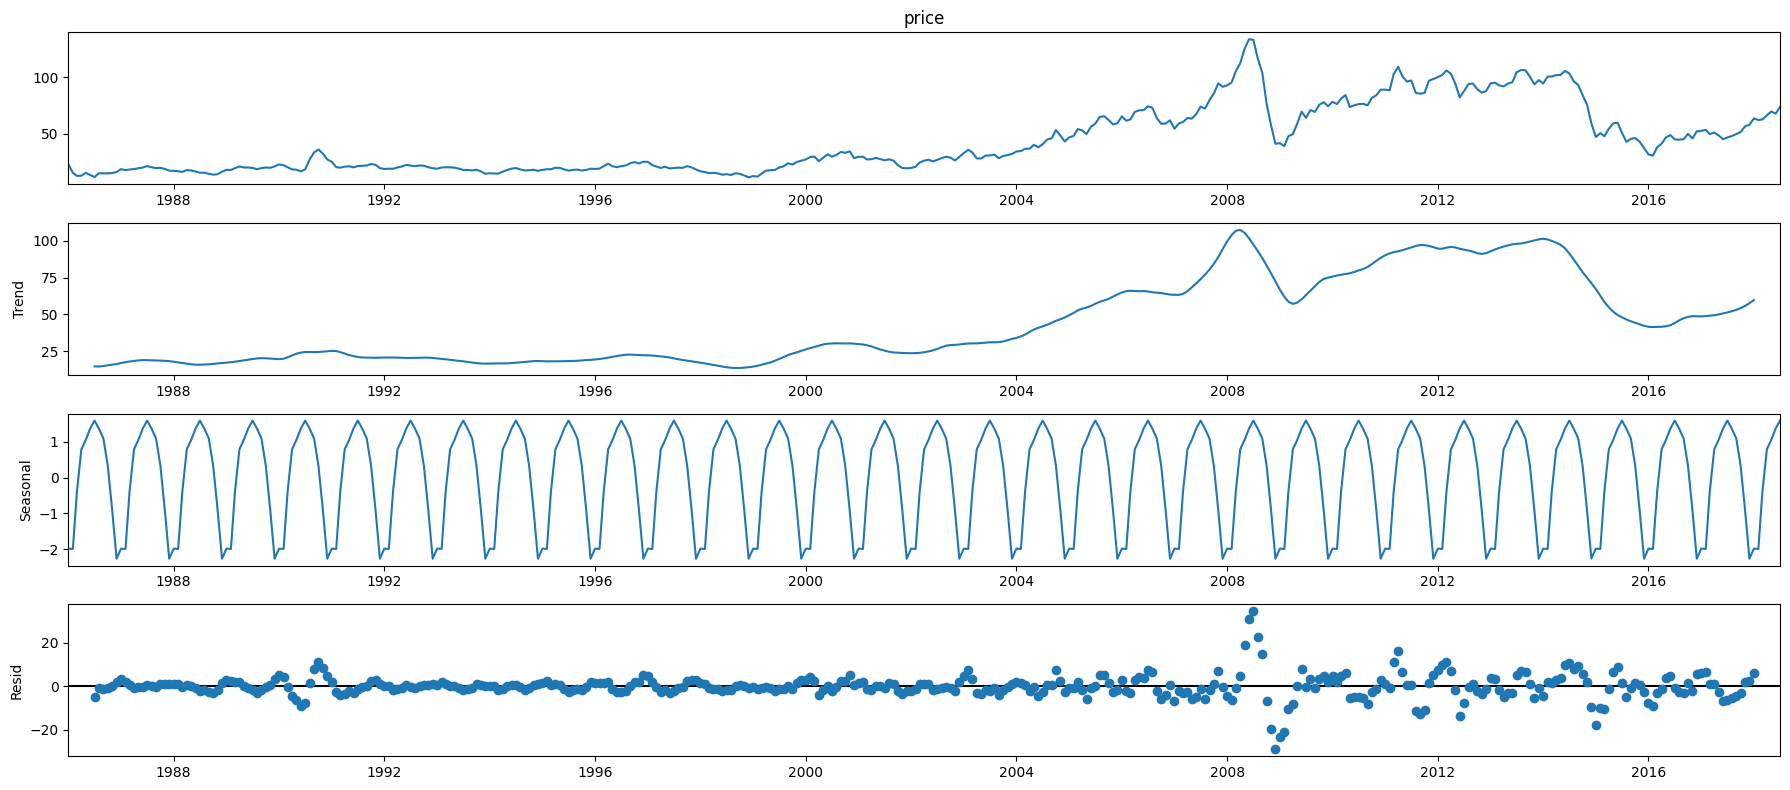

In [77]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Feature Scaling


In [78]:
df1 = df.reset_index()['price']
sc = MinMaxScaler(feature_range = (0, 1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [79]:
df1.shape

(8216, 1)

## Train Test Split

In [80]:
train_size = int(len(df1) * 0.80)
test_size = len(df1) - train_size
train, test = df1[0:train_size, :], df1[train_size:len(df1), :]

In [81]:
len(test)

1644

## Creating Window

In [82]:
def dataset(df, lookback=1):
    data_x, data_y = [], []
    for i in range(len(df) - lookback - 1):
        a = df[i:(i + lookback), 0]
        data_x.append(a)
        data_y.append(df[i + lookback, 0])
    return np.array(data_x), np.array(data_y)

time_step = 10
# Reshape into X=t and Y=t+1
X_train , Y_train = dataset(train,time_step)
X_test , Y_test = dataset(test,time_step)
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [83]:
X_train.shape

(6561, 10, 1)

# **Model Building**

## Import the Model building libraries

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Initializing the Model
## Adding LSTM Layers
## Adding Output Layers

In [85]:
model = Sequential()
model.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 10, return_sequences = True))
model.add(LSTM(units = 10))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 10)            480       
                                                                 
 lstm_7 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_8 (LSTM)               (None, 10)                840       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,171
Trainable params: 2,171
Non-trainable params: 0
_________________________________________________________________


In [86]:
# 1st LSTM Layer 
print(4 * 10 * (1 + 10 + 1))

480


In [87]:
# 2nd LSTM Layer 
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


## Configure the Learning Process

In [88]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 64,validation_data=(X_test, Y_test),verbose=2)

Epoch 1/30
103/103 - 4s - loss: 0.0186 - val_loss: 5.0006e-04 - 4s/epoch - 41ms/step
Epoch 2/30
103/103 - 1s - loss: 4.0495e-04 - val_loss: 5.0837e-04 - 777ms/epoch - 8ms/step
Epoch 3/30
103/103 - 1s - loss: 4.0174e-04 - val_loss: 5.7609e-04 - 766ms/epoch - 7ms/step
Epoch 4/30
103/103 - 1s - loss: 3.9794e-04 - val_loss: 5.0117e-04 - 765ms/epoch - 7ms/step
Epoch 5/30
103/103 - 1s - loss: 3.8679e-04 - val_loss: 5.3132e-04 - 768ms/epoch - 7ms/step
Epoch 6/30
103/103 - 1s - loss: 3.8449e-04 - val_loss: 4.8390e-04 - 758ms/epoch - 7ms/step
Epoch 7/30
103/103 - 1s - loss: 3.8379e-04 - val_loss: 5.4562e-04 - 819ms/epoch - 8ms/step
Epoch 8/30
103/103 - 1s - loss: 3.6803e-04 - val_loss: 4.4301e-04 - 823ms/epoch - 8ms/step
Epoch 9/30
103/103 - 1s - loss: 3.7161e-04 - val_loss: 5.3517e-04 - 848ms/epoch - 8ms/step
Epoch 10/30
103/103 - 1s - loss: 3.6400e-04 - val_loss: 4.5323e-04 - 765ms/epoch - 7ms/step
Epoch 11/30
103/103 - 1s - loss: 3.5425e-04 - val_loss: 4.5625e-04 - 777ms/epoch - 8ms/step
Epo

## Train the model

In [89]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

52/52 [==============================] - 0s 2ms/step


In [90]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

## Model evaluation

In [91]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 1.4487028092877237
Train Root Mean Squared Error: 2.2174696984485136
Test Mean Absolute Error: 2.0052328296388064
Test Root Mean Squared Error: 2.5947630798519734


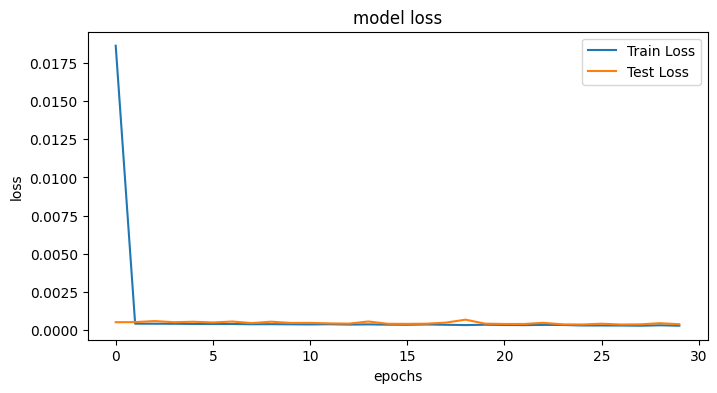

In [92]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

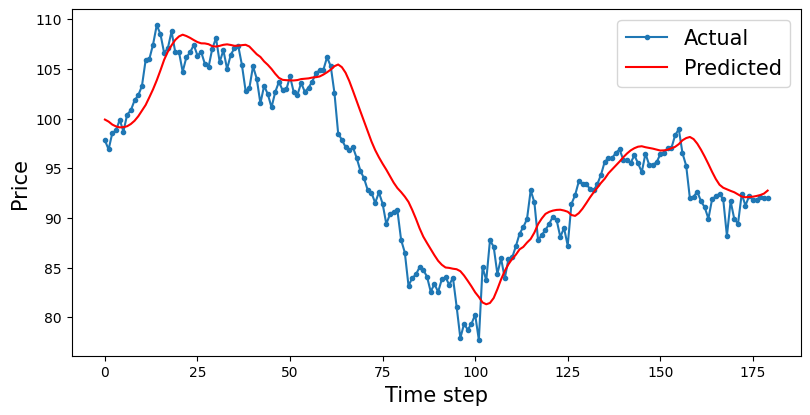

In [93]:
data = [i for i in range(180)]
plt.figure(figsize=(8,4))
plt.plot(data, Y_test[0][:180], marker='.', label="Actual")
plt.plot(data, test_predict[:,0][:180], 'r', label="Predicted")
plt.tight_layout()
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## Save the model

In [94]:
model.save("model.h5")
!tar -zcvf model.tgz model.h5

model.h5


## Test the model

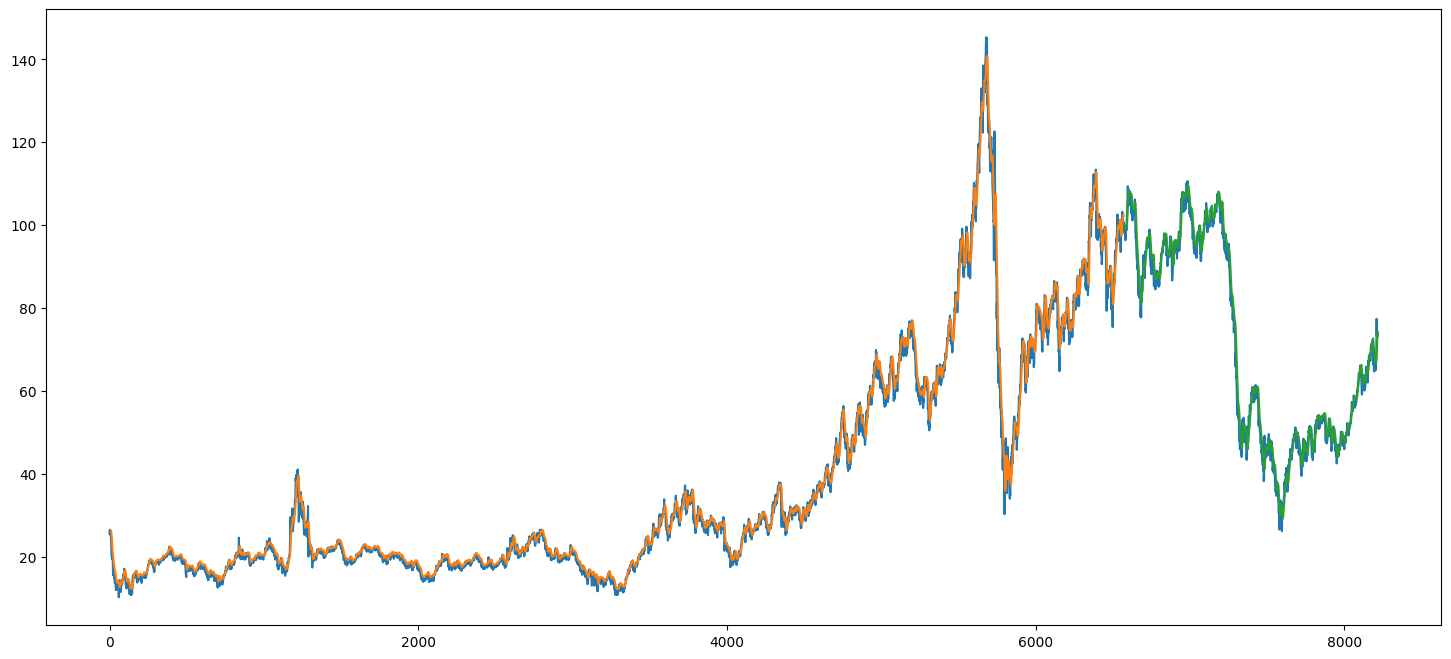

In [95]:
# Model Testing
look_back = 10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [96]:
x_input = test[len(test)-10:].reshape(1,-1)
x_input.shape

(1, 10)

In [97]:
temp_input = list(x_input[0])
temp_list = temp_input[0].tolist()

In [98]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [99]:
lst_output = []
n_steps = 10
i = 0
while(i<10):
  if(len(temp_input) > 10):
    x_input = np.array(temp_input[1:])
    print("Day {} Input {}".format(i,x_input),end="\n")
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("Day {} Output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    print("------------------------",end="\n")
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("Day {} output {}".format(i,yhat),end="\n")
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i = i+1

Day 0 output [[0.4806341]]
Day 1 Input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.48063409]
Day 1 Output [[0.48226583]]
------------------------
Day 2 Input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.48063409 0.48226583]
Day 2 Output [[0.48220608]]
------------------------
Day 3 Input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.48063409 0.48226583 0.48220608]
Day 3 Output [[0.4819416]]
------------------------
Day 4 Input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.48063409 0.48226583 0.48220608 0.48194161]
Day 4 Output [[0.48364362]]
------------------------
Day 5 Input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.48063409
 0.48226583 0.48220608 0.48194161 0.48364362]
Day 5 Output [[0.485176]]
------------------------
Day 6 Input [0.47341922 0.46497853 0.47038353 0.47149415 0.48063409 0.48226583
 0.4822